<a href="https://colab.research.google.com/github/Daria1325/Neural_Network_2022/blob/main/Lab4/Lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторна робота №4 <br>
З дисципліни "Нейронні мережі"<br>
студентки КН-31<br>
Боженко Дар'ї<br>

##Завдання
1. На основі документу вирішити завдання класифікації для набору даних
Fashion MNIST.
2. Для моделювання використати 3 класи індекси яких взяти відповідно до
номеру у списку групи.
3. Моделювання провести із використанням нейронної мережі (Flatten &amp; Dense
layers).
4. Здійснити вибір оптимального кроку градієнтного алгоритму (learning_rate), а
також побудову Confusion Matrix.
5. Результати оформити у вигляді файлу з кодом для моделювання та
візуалізації у форматі .ipynb
6. Результати викласти у репозиторії GitHub (папка Lab4).
7. Підготуватися до захисту лабораторної роботи (пояснення коду, відповіді на
запитання за темою)

Отримаємо дані Fashion MNIST.

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [2]:
class_names = ['Pullover', 'Sandal', 'Ankle boot']

Оберемо данні 3 класів за варіантом

In [24]:
import numpy as np

myTrain_data = []
myTrain_labels = []
myTest_data=[]
myTest_labels  = []
for i in range(len(train_labels)):
  if (train_labels[i]==2 or train_labels[i]==5 or train_labels[i]==9 ):
    myTrain_data.append(train_data[i])
    myTrain_labels.append(train_labels[i])
for i in range(len(test_labels)):
  if (test_labels[i]==2 or test_labels[i]==5 or test_labels[i]==9 ):
    myTest_data.append(test_data[i])
    myTest_labels.append(test_labels[i])

my_train_data = np.array(myTrain_data)
my_train_labels = np.array(myTrain_labels)
my_test_data= np.array(myTest_data)
my_test_labels  = np.array(myTest_labels)

Виведемо декілька екземплярів наших даних.

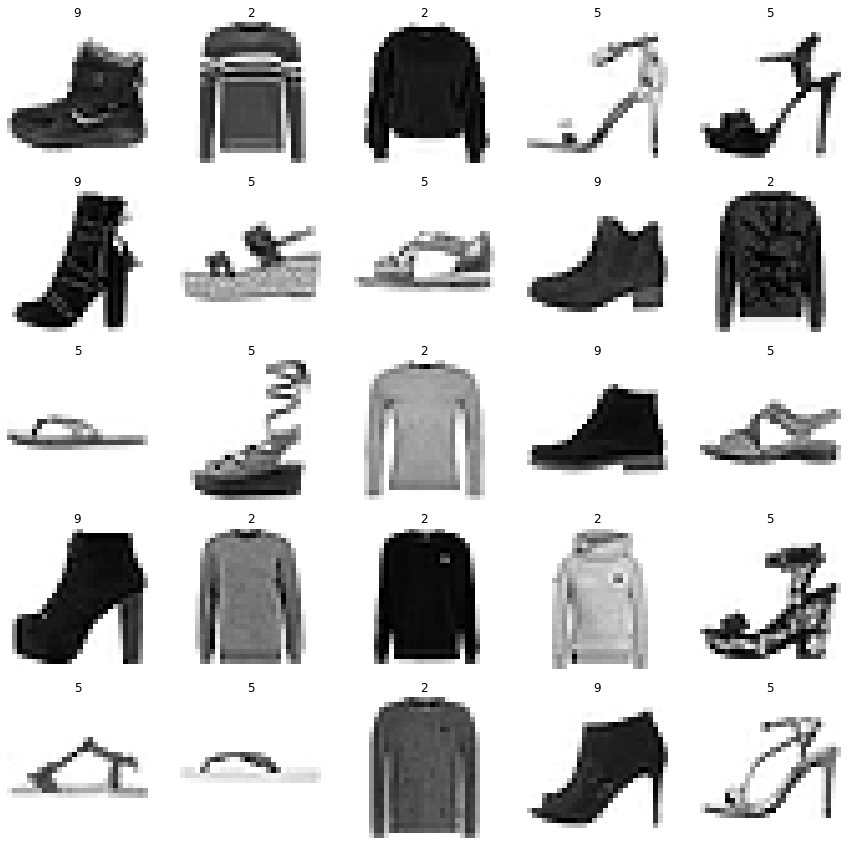

In [25]:
import random
plt.figure(figsize=(15, 15))
for i in range(25):
  ax = plt.subplot(5, 5, i + 1)
  rand_index = random.choice(range(len(my_train_data)))
  plt.imshow(my_train_data[i], cmap=plt.cm.binary)
  plt.title(my_train_labels[i])
  plt.axis(False)

Нормуємо дані.

In [26]:
# Divide train and test images by the maximum value (normalize it)
my_train_data = my_train_data / 255.0
my_test_data = my_test_data / 255.0

# Check the min and max values of the training data
my_train_data.min(), my_train_data.max()

(0.0, 1.0)

Проведемо моделювання із використанням нейронної мережі (Flatten & Dense layers)

In [27]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_13 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") 
])

# Compile the model
model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# Fit the model
find_lr_history = model_13.fit(my_train_data,
                               my_train_labels,
                               epochs=40,
                               validation_data=(my_test_data, my_test_labels),
                               callbacks=[lr_scheduler])

Epoch 1/40
563/563 [==============================] - 3s 5ms/step - loss: 1.4037 - accuracy: 0.5839 - val_loss: 0.9020 - val_accuracy: 0.8197 - lr: 1.0000e-04
Epoch 2/40
563/563 [==============================] - 2s 4ms/step - loss: 0.5770 - accuracy: 0.8871 - val_loss: 0.3930 - val_accuracy: 0.9093 - lr: 1.1220e-04
Epoch 3/40
563/563 [==============================] - 2s 4ms/step - loss: 0.3029 - accuracy: 0.9332 - val_loss: 0.2426 - val_accuracy: 0.9453 - lr: 1.2589e-04
Epoch 4/40
563/563 [==============================] - 2s 4ms/step - loss: 0.1965 - accuracy: 0.9543 - val_loss: 0.1684 - val_accuracy: 0.9577 - lr: 1.4125e-04
Epoch 5/40
563/563 [==============================] - 2s 4ms/step - loss: 0.1408 - accuracy: 0.9635 - val_loss: 0.1287 - val_accuracy: 0.9647 - lr: 1.5849e-04
Epoch 6/40
563/563 [==============================] - 2s 4ms/step - loss: 0.1086 - accuracy: 0.9706 - val_loss: 0.1040 - val_accuracy: 0.9717 - lr: 1.7783e-04
Epoch 7/40
563/563 [==========================

Здійснити вибір оптимального кроку градієнтного алгоритму (learning_rate)

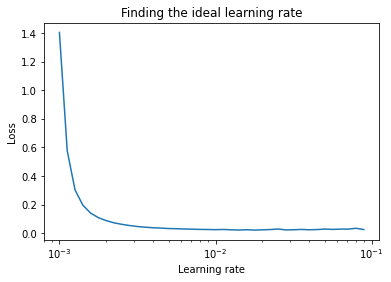

In [28]:
# Plot the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt
lrs = 1e-3 * (10**(np.arange(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"]) 
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate");

Здійснемо навчання моделі з оптимальним кроком

In [29]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_14 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), 
  tf.keras.layers.Dense(3, activation="relu"),
  tf.keras.layers.Dense(3, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") 
])

# Compile the model
model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(lr=0.01), 
                 metrics=["accuracy"])

# Fit the model
history = model_14.fit(my_train_data,
                       my_train_labels,
                       epochs=20,
                       validation_data=(my_test_data, my_test_labels))

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


563/563 [==============================] - 3s 4ms/step - loss: 0.2231 - accuracy: 0.9117 - val_loss: 0.0828 - val_accuracy: 0.9770
Epoch 2/20
563/563 [==============================] - 2s 4ms/step - loss: 0.0708 - accuracy: 0.9765 - val_loss: 0.0770 - val_accuracy: 0.9773
Epoch 3/20
563/563 [==============================] - 2s 4ms/step - loss: 0.0589 - accuracy: 0.9805 - val_loss: 0.1103 - val_accuracy: 0.9710
Epoch 4/20
563/563 [==============================] - 2s 4ms/step - loss: 0.0510 - accuracy: 0.9833 - val_loss: 0.0843 - val_accuracy: 0.9747
Epoch 5/20
563/563 [==============================] - 2s 4ms/step - loss: 0.0428 - accuracy: 0.9851 - val_loss: 0.0710 - val_accuracy: 0.9793
Epoch 6/20
563/563 [==============================] - 2s 4ms/step - loss: 0.0463 - accuracy: 0.9828 - val_loss: 0.0639 - val_accuracy: 0.9810
Epoch 7/20
563/563 [==============================] - 2s 4ms/step - loss: 0.0396 - accuracy: 0.9863 - val_loss: 0.0541 - val_accuracy: 0.9827
Epoch 8/20
563/56

Побудувати Confusion Matrix

In [30]:
import itertools
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(3, 3), text_size=15): 

  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), 
         yticks=np.arange(n_classes), 
         xticklabels=labels, 
         yticklabels=labels)
  
  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

In [31]:
# Make predictions with the most recent model
y_probs = model_14.predict(my_test_data)

# Convert all of the predictions from probabilities to labels
y_preds = y_probs.argmax(axis=1)

# View the first 3 prediction labels
y_preds[:3]


array([9, 2, 5])

In [32]:
# Check out the non-prettified confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=my_test_labels, 
                 y_pred=y_preds)

array([[1000,    0,    0],
       [   5,  955,   40],
       [   1,   15,  984]])

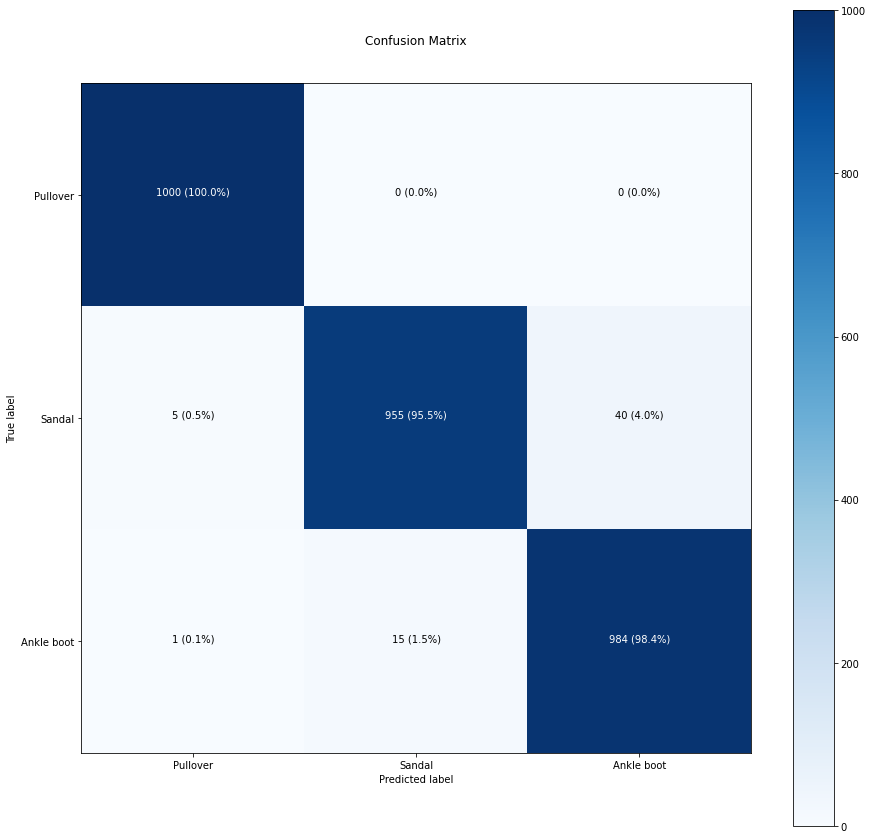

In [33]:
# Make a prettier confusion matrix
make_confusion_matrix(y_true=my_test_labels, 
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)

## Висновок
У ході лабораторної роботи було набуто практичних навичок з вирішення задачі класифікації за допомогою нейронної мережі Flatten & Dense layers. Ознайомились з поняттям confusion matrix та побудували її.